# Imports

In [9]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
from tensorboard.backend.event_processing import event_accumulator
import tensorflow as tf
import glob
import os
#tf.logging.set_verbosity(tf.logging.ERROR)

# Load Tensorboard Log

In [10]:
def load_tf(dirname, basedir):
    prefix = basedir
    dirname = prefix + dirname
    dirname = glob.glob(dirname + '/*')[0]
    
    ea = event_accumulator.EventAccumulator(dirname, size_guidance={event_accumulator.SCALARS: 0})
    ea.Reload()
    dframes = {}
    mnames = ea.Tags()['scalars']
    
    for n in mnames:
        dframes[n] = pd.DataFrame(ea.Scalars(n), columns=["wall_time", "epoch", n.replace('val/', '')])
        dframes[n].drop("wall_time", axis=1, inplace=True)
        dframes[n] = dframes[n].set_index("epoch")
    return pd.concat([v for k,v in dframes.items()], axis=1)

def load_tf_jobs(regex, basedir):
    prefix = basedir + "results/"
    job_dirs = glob.glob(prefix + regex)

    rows = []
    for job in job_dirs:
        job_name = os.path.basename(os.path.normpath(job))
        
        # this loads in all the hyperparams from another file,
        # do your own thing here instead
        options = load_json(job + '/opt.json')
        try:
            results = load_tf(job.replace(prefix, ''), basedir)
        except:
            continue

        for opt in options:
            results[opt] = options[opt]
        rows.append(results)

    for row in rows:
        row['epoch'] = row.index
        row.reset_index(drop=True, inplace=True)
    df = pd.concat(rows)
    return df

In [90]:
import os
run = "trial_2/"
basedir = "/Users/arthurvandenhoeke/Documents/EhB/courses/Robotics/Project/src/"
#runs = os.listdir(basedir + run)
runs = [r.split('/')[-1] for r in glob.glob(basedir + run + '*')]
idx = np.sort([[int(n) for n in e if n.isdigit()][0] for e in list(map(lambda x: x.split('_'), runs))])

In [91]:
runs

['run_2', 'run_5', 'run_4', 'run_3', 'run_6', 'run_1', 'run_8', 'run_7']

In [92]:
res = pd.concat([load_tf(dirname="run_" + str(i), basedir=basedir+run) for i in idx])
res = res.reset_index(drop=True)
res.index = np.asarray(list(res.index))*8

Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwri

In [93]:
res

,loss/entropy_loss,loss/policy_gradient_loss,loss/value_function_loss,loss/approximate_kullback-leibler,loss/clip_factor,loss/loss,input_info/discounted_rewards,input_info/learning_rate,input_info/advantage,input_info/clip_range,input_info/clip_range_vf,input_info/old_neglog_action_probability,input_info/old_value_pred
0,1.386293,-8.195639e-08,3.800315,0.000000,0.0,1.886294,-2.604675,0.00025,8.195639e-08,0.2,0.2,1.386492,-0.019805
8,1.386292,-1.969263e-04,4.347086,0.000003,0.0,2.159483,-2.886884,0.00025,3.352761e-08,0.2,0.2,1.386483,-0.024853
16,1.386287,-1.334645e-03,4.484016,0.000006,0.0,2.226811,-2.870805,0.00025,1.601875e-07,0.2,0.2,1.386418,-0.035111
24,1.386275,-7.946417e-04,4.804893,0.000021,0.0,2.387789,-3.033085,0.00025,5.960464e-08,0.2,0.2,1.386444,-0.026579
32,1.386260,-1.188554e-03,4.202050,0.000033,0.0,2.085974,-2.831340,0.00025,7.450581e-09,0.2,0.2,1.386973,-0.017114
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64600,0.461651,-1.424015e-03,2.747604,0.000332,0.0,1.367762,-21.348312,0.00025,-7.450581e-09,0.2,0.2,0.416777,-20.529757
64608,0.468414,-1.637092e-02,2.161695,0.001909,0.0,1.059793,-21.143913,0.00025,0.000000e+00,0.2,0.2,0.871987,-20.561058
64616,0.470023,-5.123928e-03,2.206306,0.000589,0.0,1.093329,-20.950607,0.00025,0.000000e+00,0.2,0.2,0.461923,-20.535910
64624,0.587542,-2.695866e-03,0.754824,0.001776,0.0,0.368841,-20.147163,0.00025,-2.235174e-08,0.2,0.2,0.451685,-20.620283


In [83]:
res["smooth"] = res["input_info/rewards"].ewm(span = 100).mean()

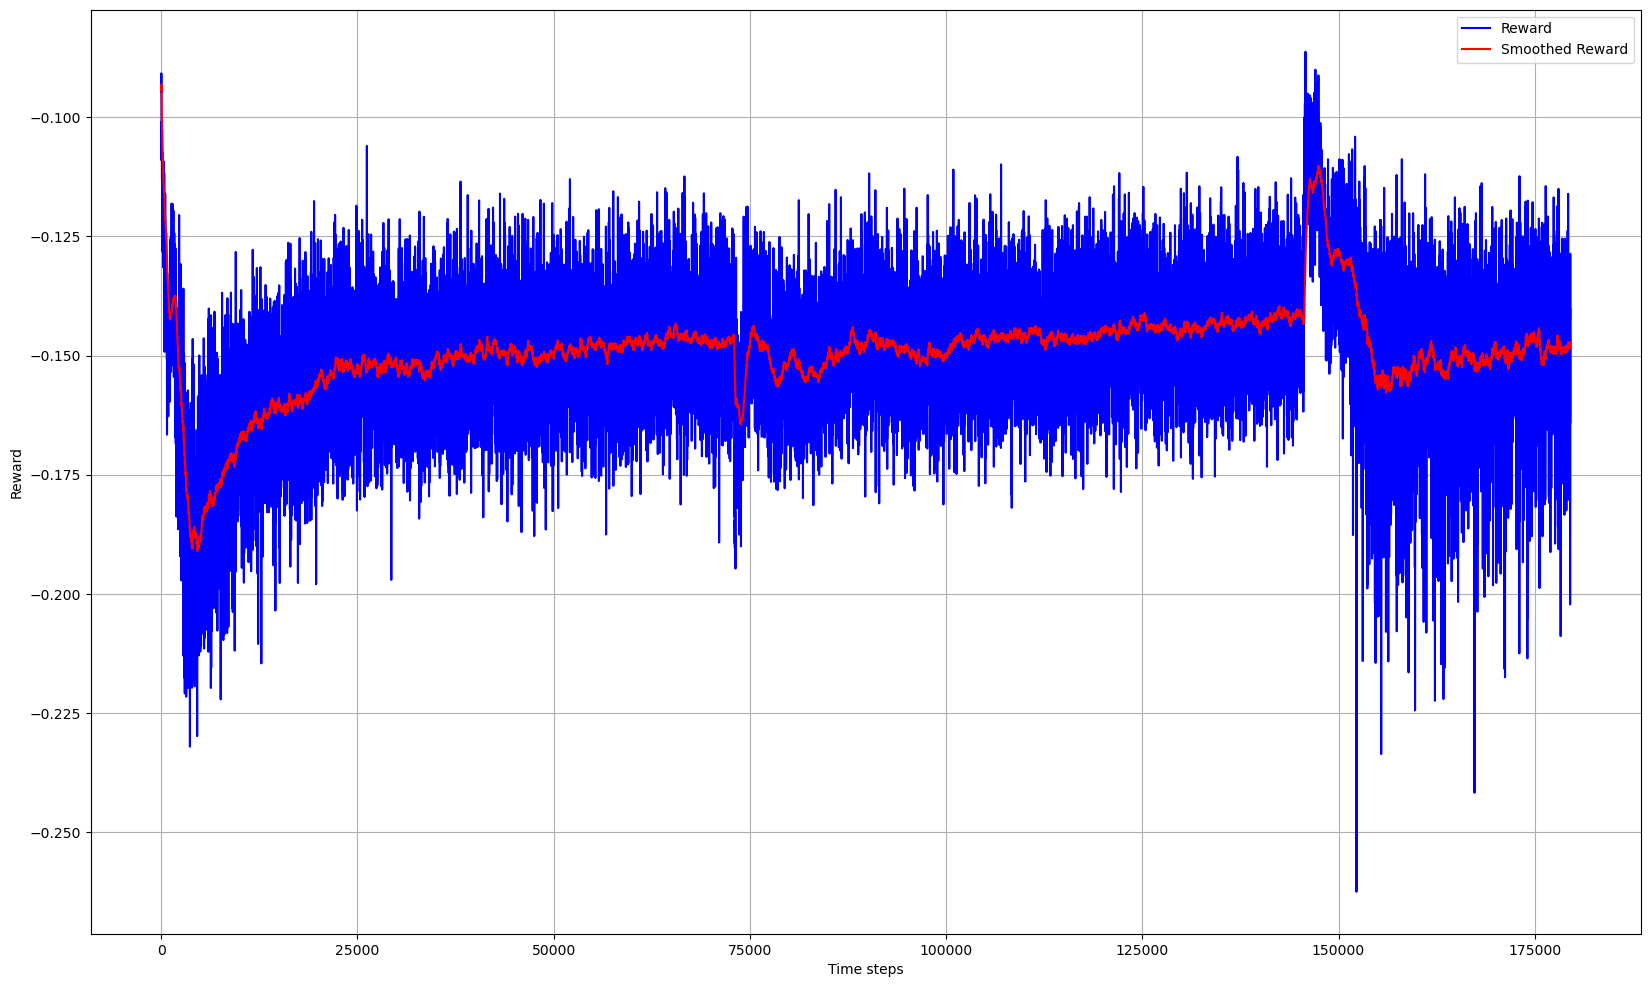

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [87]:
fig = plt.figure(figsize=(20,12))
plt.plot(res["input_info/rewards"], 'b', label="Reward")
plt.plot(res["smooth"], 'r', label="Smoothed Reward")
plt.xlabel("Time steps")
plt.ylabel("Reward")
plt.grid(True)
plt.legend()
plt.show()
fig.savefig('ppo2_1.eps', format='eps')

In [72]:
np.sqrt(640**2 + 360**2)

734.3023900274328

# Plot reward distribution

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [2]:
def gaussian(x: float, y: float) -> float:
    return np.exp(-(x**2 + y**2))

In [3]:
X = np.arange(-1, 1, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = 1-np.exp(R)

<Figure size 640x480 with 0 Axes>

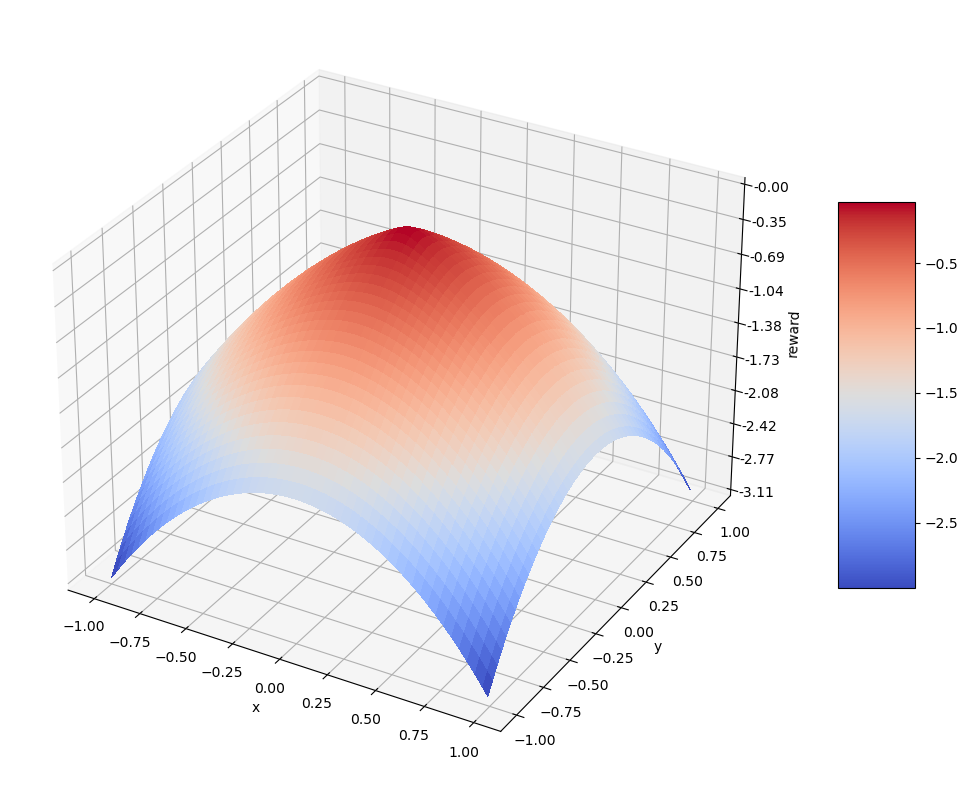

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [6]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,10))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Set axis labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('reward')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
fig.savefig('reward.eps', format='eps')